## Import of all packages
First we do a import of all the packages so we can use all the functions

In [24]:
%matplotlib inline
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import geopandas
import geoplot
import geoplot.crs as gcrs
import math
import sqlite3
import datetime as dt
import sqlalchemy
from numpy.random import random
from sqlalchemy import create_engine
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean

# Tennis 

## Constructing a subset of the raw tennis dataset such that we can use it for our analysis

#### Forkert metode - MÅ IKKE BRUGES

#hvis filen vi danner i forvejen findes slettes den så der kan køres en ny
if os.path.exists("Dataset/atp-matches-dataset/Tennis_mod.csv"):
    os.remove("Dataset/atp-matches-dataset/Tennis_mod.csv")
else:
    print('File does not exists')

#alle filer med format csv medtages og samles i tennis_total
extension = 'csv'
all_filenames = [i for i in glob.glob('Dataset/atp-matches-dataset/*.{}'.format(extension))]
Tennis_total = pd.concat([pd.read_csv(f) for f in all_filenames ])

#Vælger hvilke kolonner i tennis_total vi vil have med og danner det endelige dataset Tennis_mod
keep_col = ['tourney_id','tourney_name','surface','draw_size','winner_ht', 'winner_age', 'winner_rank', 'winner_rank_points','winner_ioc'] 
Tennis_mod=Tennis_total[keep_col]

filter = Tennis_mod["tourney_id"] != ""
Tennis_mod = Tennis_mod[filter]
filter = Tennis_mod["tourney_name"] != ""
Tennis_mod = Tennis_mod[filter]
filter = Tennis_mod["surface"] != ""
Tennis_mod = Tennis_mod[filter]
filter = Tennis_mod["draw_size"] != 0
Tennis_mod = Tennis_mod[filter]
filter = Tennis_mod["winner_ht"] != 0
Tennis_mod = Tennis_mod[filter]
filter = Tennis_mod["winner_age"] != 0
Tennis_mod = Tennis_mod[filter]
filter = Tennis_mod["winner_rank"] != 0
Tennis_mod = Tennis_mod[filter]
filter = Tennis_mod["winner_rank_points"] != 0
Tennis_mod = Tennis_mod[filter]

#Laver tennis_mod til csv som gemmes i samme mappe med stien
Tennis_mod.to_csv( "Dataset/atp-matches-dataset/Tennis_mod.csv", index=False, encoding='utf-8-sig')

#et stk. printet samlet tabel
Tennis_mod.head()

# Nedenstående er rigtigt (starten på opgaven)

In [68]:


DATAPATH = "/Users/LasseLindberg/Desktop/OneDrive - Københavns Universitet/Københavnsuniversitet/Økonomi/Kandidat/8. Semester/Introduction to programming and numerical analysis/projects-2019-ccl/dataproject/Dataset/atp-matches-dataset/"

data = []

for i in range(2000, 2016):
    data.append(pd.read_csv(DATAPATH + "atp_matches_" + str(i) + ".csv", dtype={"winner_hand": str,"tourney_id": str}))

data_tennis = pd.concat(data)

data_tennis.describe()

data_tennis.tail()

data_tennis.columns =['Tourney_id','Tourney_name','Surface','Draw_size','Tourney_level','Date',
                      'Match_number','Winner_id', 'Winner_seed', 'Winner_entry',
       'Winner_name', 'Winner_hand', 'Winner_hight', 'Winner_country', 'Winner_age',
       'Winner_rank', 'Winner_rank_points', 'Loser_id', 'Loser_seed',
       'Loser_entry', 'Loser_name', 'Loser_hand', 'Loser_hight', 'Loser_country',
       'Loser_age', 'Loser_rank', 'Loser_rank_points', 'Match_score', 'best_of',
       'round', 'minutes', 'Winner_aces', 'Winner_double_faults', 'Winner_serve_points', 'Winner_1st_serve_in', 'Winner_1st_serve_won',
       'Winner_2nd_serve_won', 'Winner_serve_games_played', 'Winner_break_points_saved', 'Winner_break_points_faced', 'Loser_aces', 'Loser_double_faults','Loser_serve_points', 'Loser_1st_serve_in', 'Loser_1st_serve_won', 'Loser_2nd_serve_won', 'Loser_serve_games_played', 'Loser_break_points_saved',
       'Loser_break_points_faced']
data_tennis.head()

Tennis_subset = data_tennis[['Tourney_name','Surface','Draw_size','Tourney_level','Winner_id', 'Winner_seed',
       'Winner_name', 'Winner_hand', 'Winner_hight', 'Winner_country', 'Winner_age',
       'Winner_rank', 'Loser_id', 'Loser_seed',
       'Loser_entry', 'Loser_name', 'Loser_hand', 'Loser_hight', 'Loser_country',
       'Loser_age', 'Loser_rank','minutes', 'Winner_aces', 'Winner_double_faults', 'Winner_serve_points', 'Winner_1st_serve_in', 'Winner_1st_serve_won',
       'Winner_2nd_serve_won', 'Winner_serve_games_played', 'Winner_break_points_saved', 'Winner_break_points_faced', 'Loser_aces', 'Loser_double_faults','Loser_serve_points', 'Loser_1st_serve_in', 'Loser_1st_serve_won', 'Loser_2nd_serve_won', 'Loser_serve_games_played', 'Loser_break_points_saved',
       'Loser_break_points_faced']]

# Hey Jakob, Jeg har forsøgt at gruppere lande på antal sejre, således at spanien er det land med flest spillere som har vundet. Dette vil jeg så indsætte i world heatmap.
Tennis_subset.groupby('Winner_country').agg({'Winner_id':'count'}).fillna(0).sort_values(['Winner_id'], ascending=False)



,Winner_id
Winner_country,
ESP,6412
FRA,4486
USA,3936
ARG,3296
GER,2645
RUS,2263
CZE,1705
SUI,1590
CRO,1429


## A short descriptive introduction the the dataset

ValueError: Wrong number of items passed 1, placement implies 73

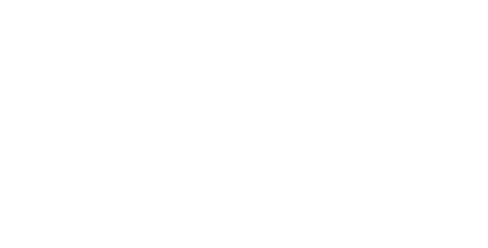

In [70]:
path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
# Add a column we'll use later
#df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']
dfs = Tennis_subset.groupby('Winner_country').agg({'Winner_id':'count'}).fillna(0).sort_values(['Winner_id'], ascending=False)

boroughs = geopandas.read_file(geopandas.datasets.get_path('nybb')).to_crs(epsg='4326')
injurious_collisions = geopandas.read_file(
    "https://github.com/ResidentMario/geoplot-data/raw/master/nyc-injurious-collisions.geojson")

geoplot.choropleth(df, hue=dfs, cmap='Pastel2', legend=True, figsize=(8, 4))
plt.title("Percentage White Residents, 2000")